      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

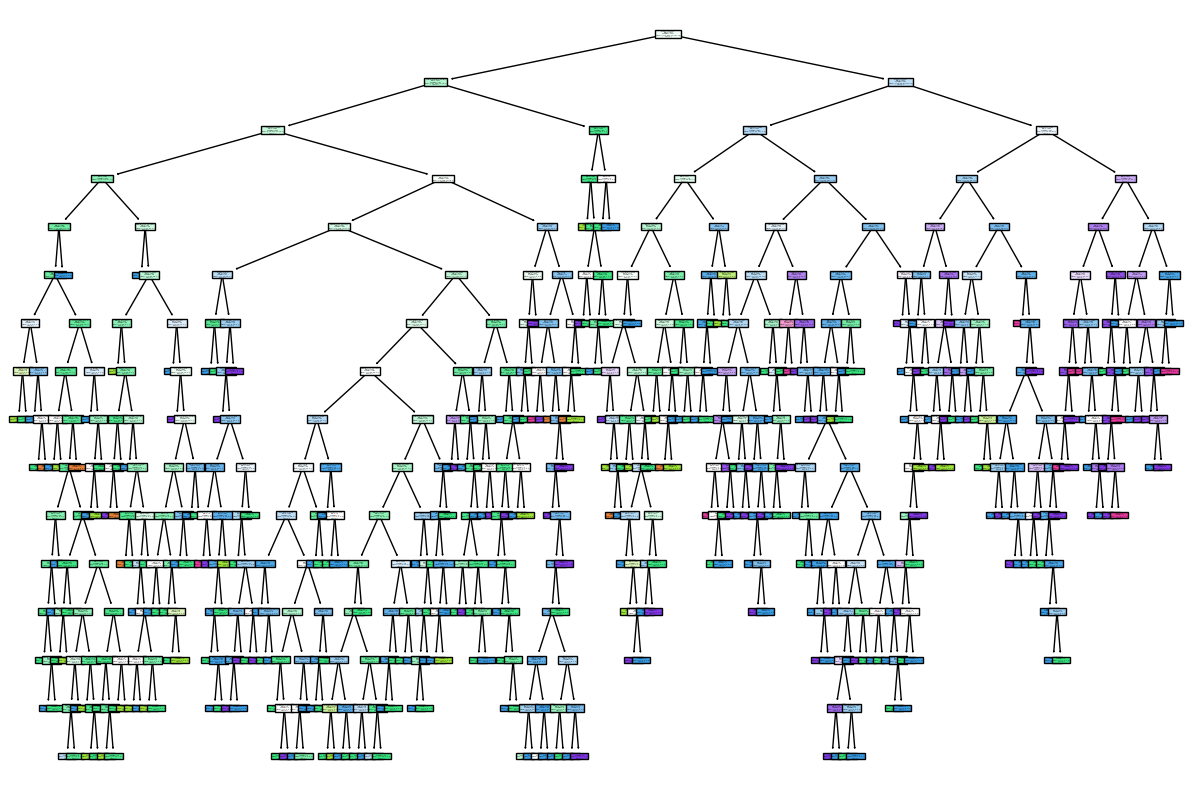


-----------------------------------------------------------------------------------------------------------



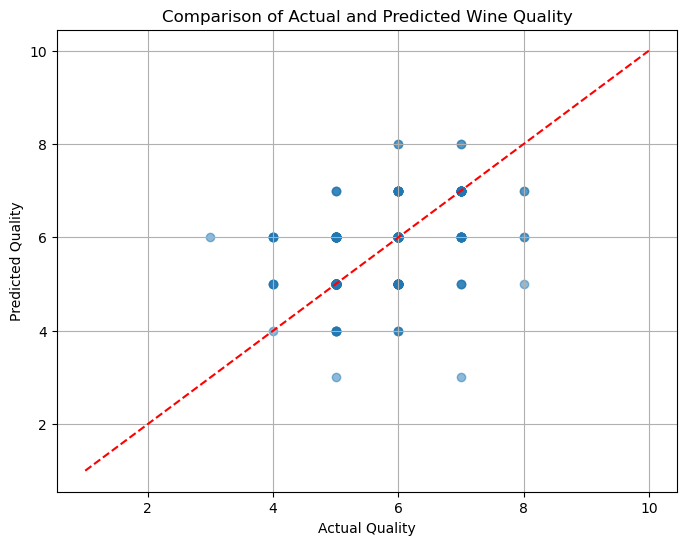

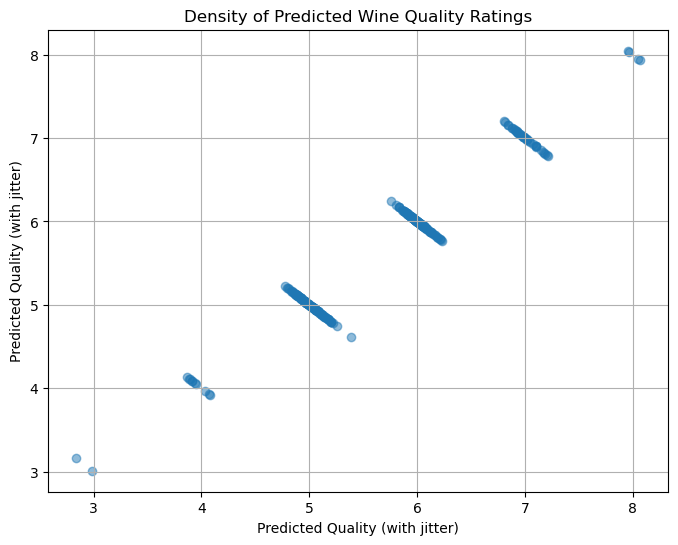

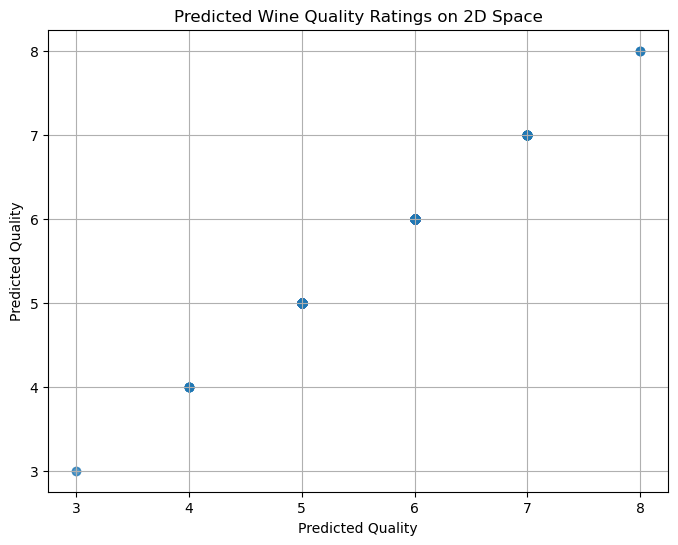

Accuracy: 0.578125
MAE: 0.503125
Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  1  4  5  0  0]
 [ 1  6 86 34  3  0]
 [ 0  3 39 75 13  2]
 [ 1  0  3 13 23  2]
 [ 0  0  1  2  2  0]]

-----------------------------------------------------------------------------------------------------------



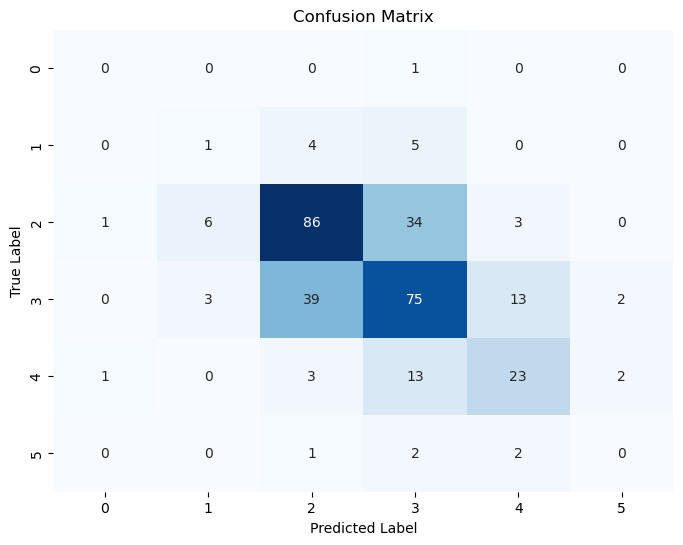


-----------------------------------------------------------------------------------------------------------

Max Depth: 3, Accuracy: 0.528125, Time: 0.004545688629150391 seconds
Max Depth: 4, Accuracy: 0.53125, Time: 0.0040836334228515625 seconds
Max Depth: 5, Accuracy: 0.559375, Time: 0.004827737808227539 seconds
Max Depth: 6, Accuracy: 0.534375, Time: 0.005707502365112305 seconds
Max Depth: 10, Accuracy: 0.559375, Time: 0.008553028106689453 seconds
Max Depth: 15, Accuracy: 0.578125, Time: 0.010253429412841797 seconds
Max Depth: 20, Accuracy: 0.56875, Time: 0.01035618782043457 seconds

-----------------------------------------------------------------------------------------------------------

Number of Trees: 5, Accuracy: 0.609375
MAE: 0.446875
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  1  5  4  0  0]
 [ 1  1 94 32  2  0]
 [ 1  5 38 79  8  1]
 [ 0  0  3 17 21  1]
 [ 0  0  0  0  5  0]]

------------------------------------------------------------------------------------------------

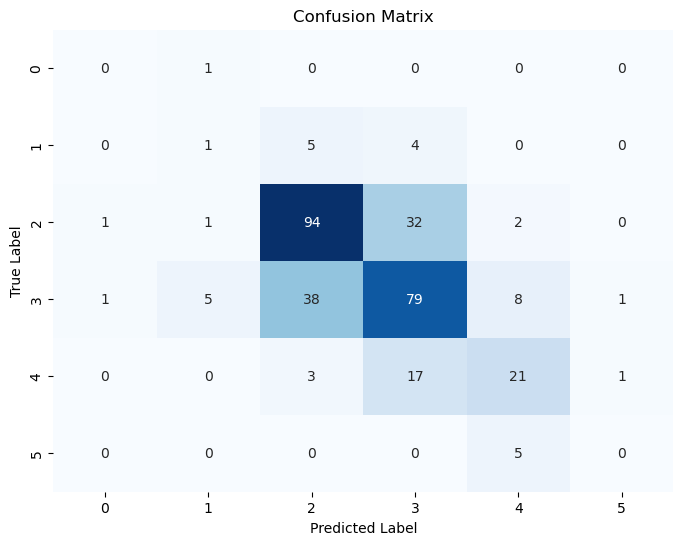


-----------------------------------------------------------------------------------------------------------

Number of Trees: 3, Accuracy: 0.540625, MAE: 0.55625
Number of Trees: 4, Accuracy: 0.60625, MAE: 0.45625
Number of Trees: 5, Accuracy: 0.609375, MAE: 0.446875
Number of Trees: 6, Accuracy: 0.61875, MAE: 0.4125
Number of Trees: 7, Accuracy: 0.60625, MAE: 0.4375
Number of Trees: 8, Accuracy: 0.634375, MAE: 0.396875
Number of Trees: 9, Accuracy: 0.646875, MAE: 0.3875

-----------------------------------------------------------------------------------------------------------

Pirmo medzio tikslumas    | Tiksliausio atsitiktinio misko tikslumas
0.578                     | 0.647                    
Pirmo medzio paklaida     | Tiksliausio atsitiktinio misko paklaida
0.503                     | 0.388                    

-----------------------------------------------------------------------------------------------------------



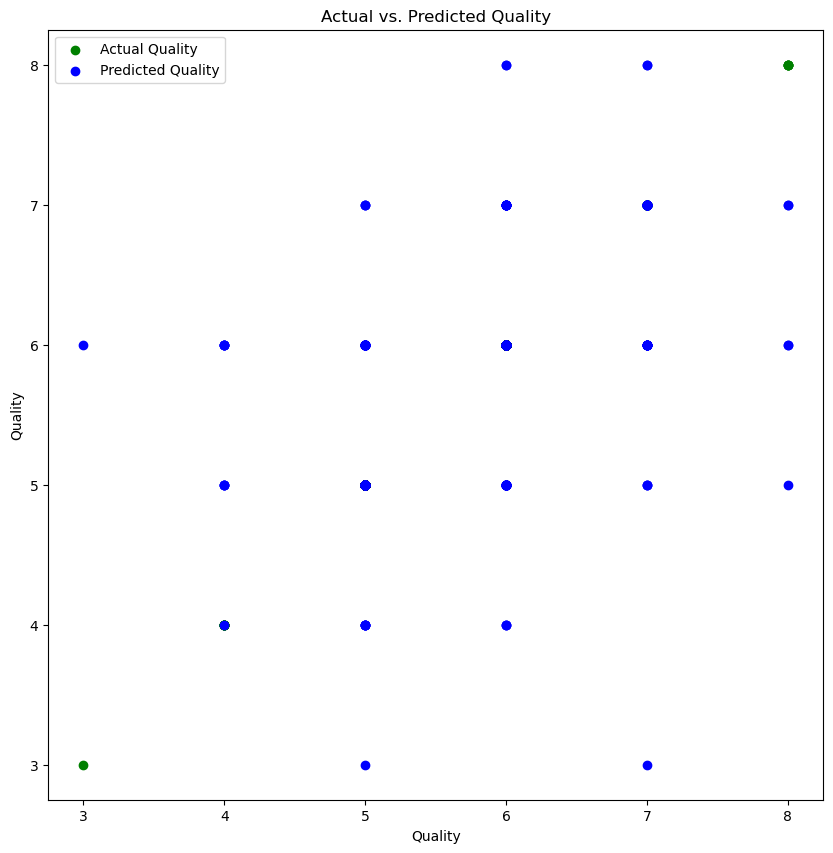

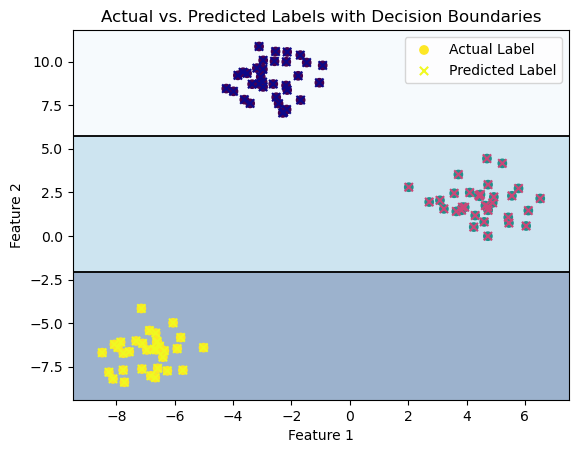

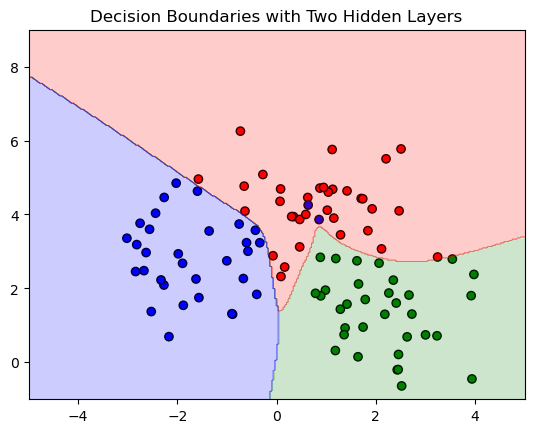

Accuracy of the Decision Tree: 100.00%


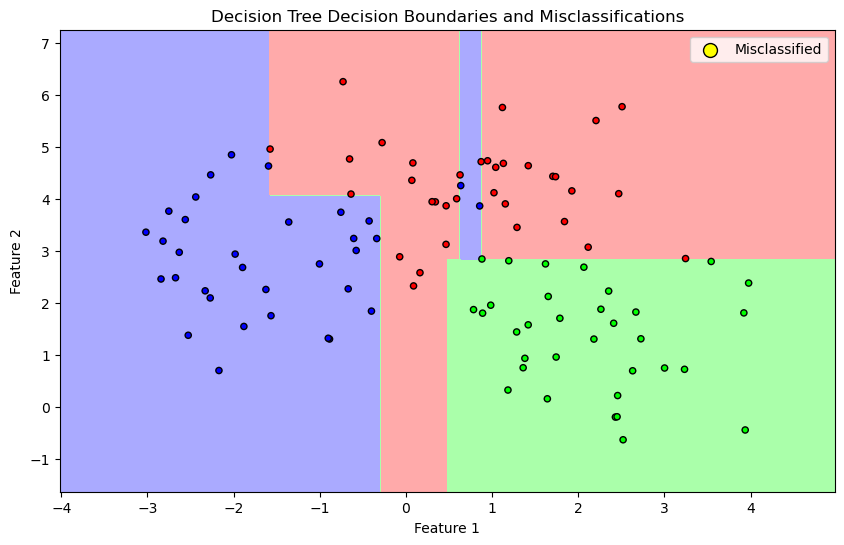

Accuracy of the Decision Tree: 100.00%
Confusion Matrix:
 [[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]


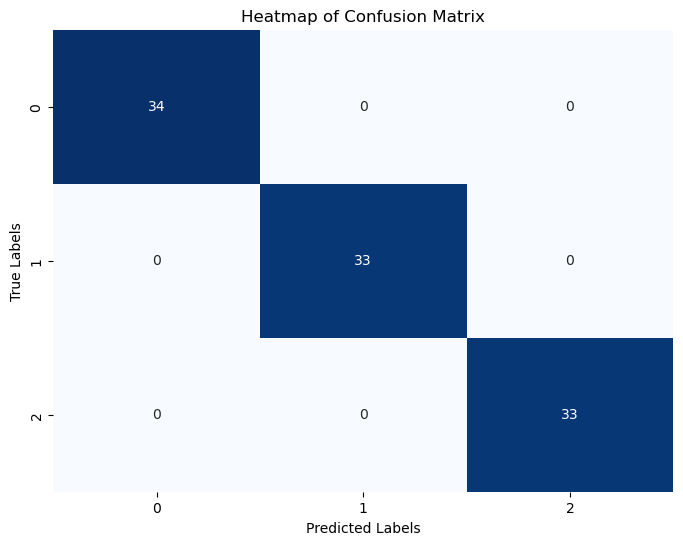

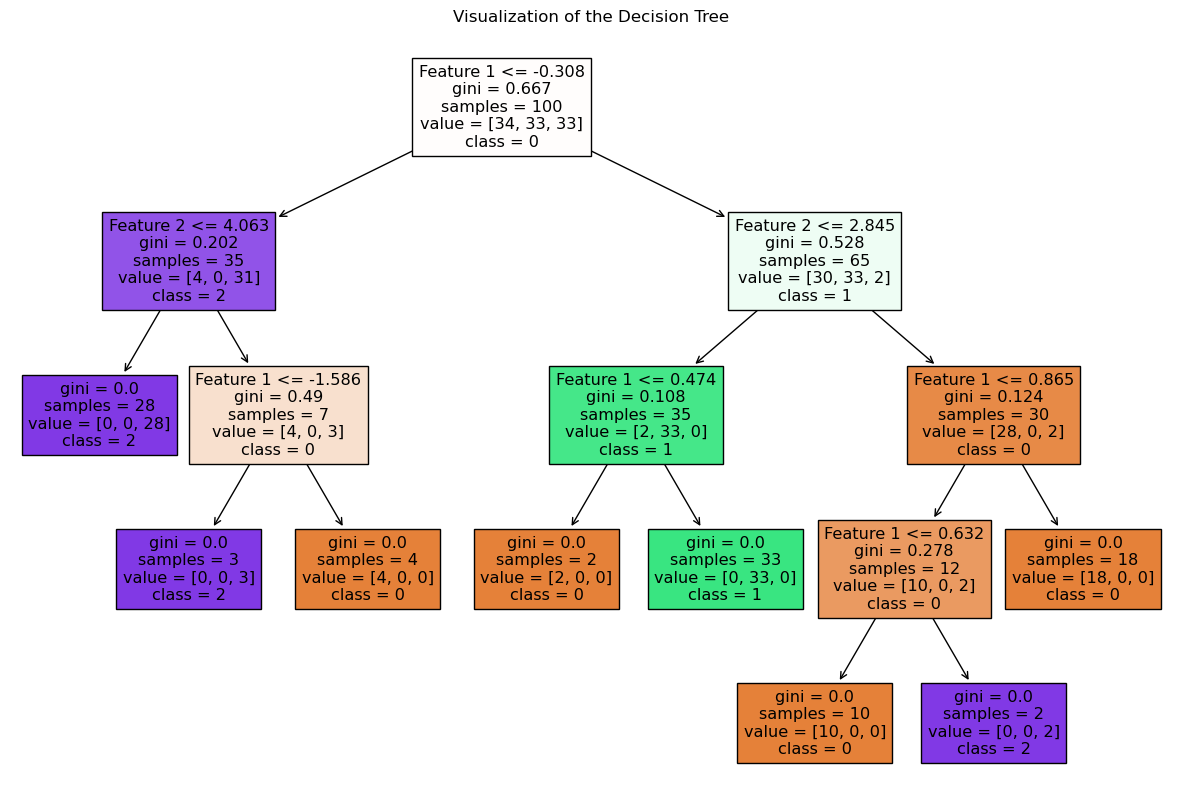

Accuracy of the Decision Tree: 55.94%
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  8  1  1  0]
 [ 0  1 99 28  2  0]
 [ 0  0 54 65 13  0]
 [ 0  0  5 22 15  0]
 [ 0  0  0  3  2  0]]


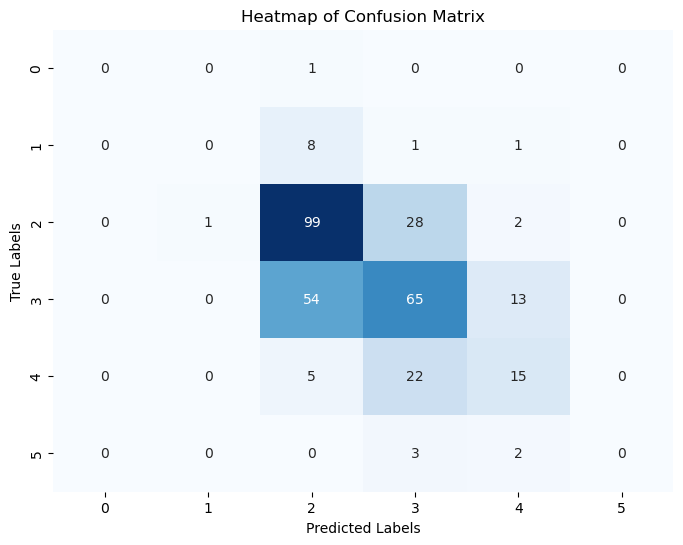

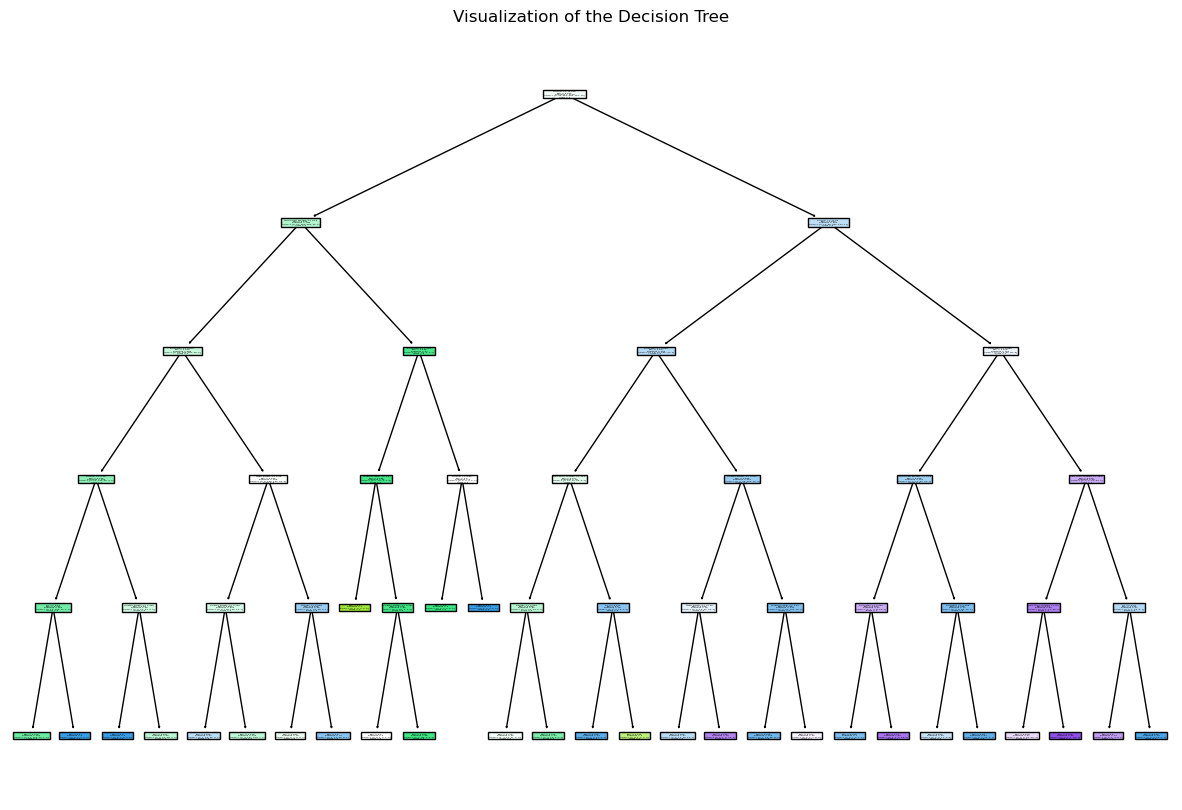

Accuracy of the Decision Tree: 51.25%
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 96 31  3  0]
 [ 0  0 56 57 19  0]
 [ 0  0  5 26 11  0]
 [ 0  0  0  1  4  0]]


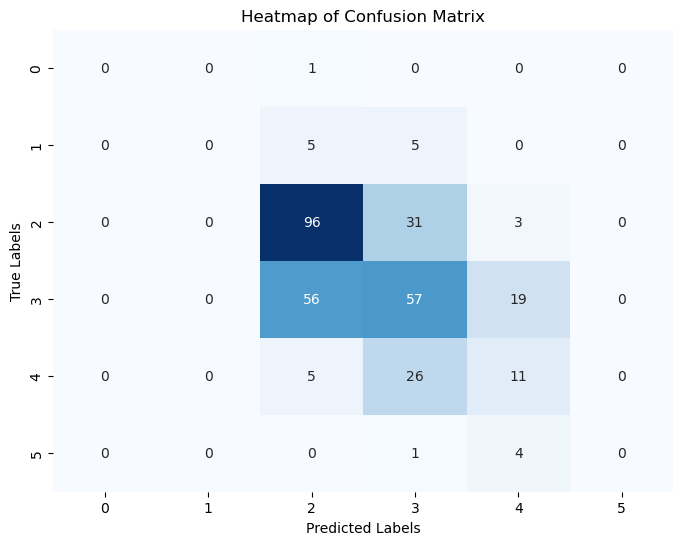

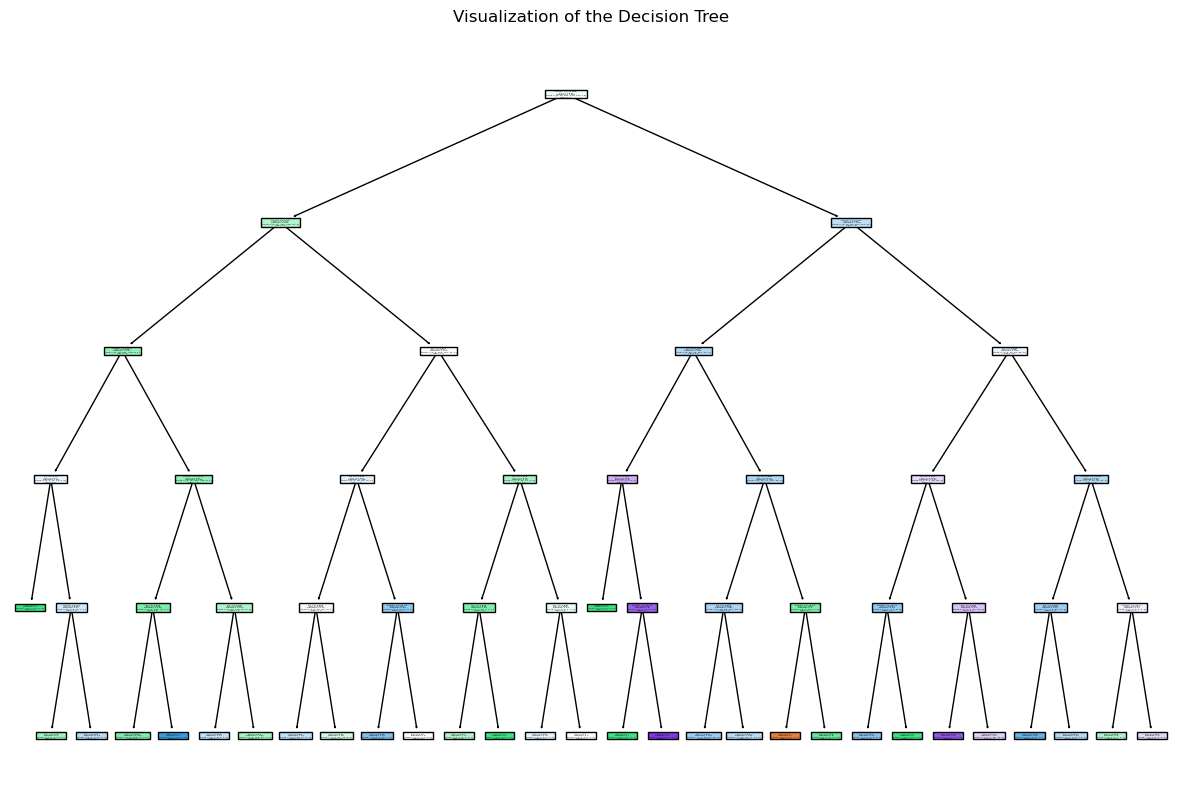

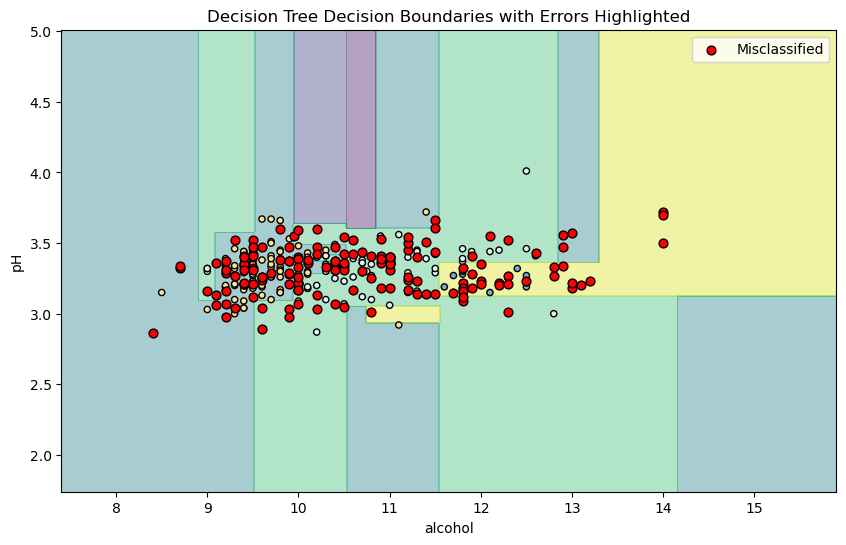

In [2]:
#Import section
#-----------------------------------------------------------------------------------------------------------
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib.colors import ListedColormap



#Define section
def line():
    print("\n-----------------------------------------------------------------------------------------------------------\n")

#skaitymas
#-----------------------------------------------------------------------------------------------------------
data = pd.read_csv("winequality-red.csv")
print(data)
line()
# Sprendimo medžio išvesčiai pasirenku Quality atributą.
#-----------------------------------------------------------------------------------------------------------
X = data.drop('quality', axis=1)
#Id = data = data.drop('id', axis=1)
y = data['quality']


# Patikrinu kardinaliu reiksmiu kieki šiame stulpelyje.
#-----------------------------------------------------------------------------------------------------------
print(y.value_counts())
line()


# Turima duomenu rinkini suskaidau i apmokymo bei testavimo poaibius
#-----------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Suskaidau duomenu poaibius i ivestis ir isvestis
#-----------------------------------------------------------------------------------------------------------
print("Apmokymo duomenų poaibio įvestys:")
print(X_train.head())
print("\nApmokymo duomenų poaibio išvestis:")
print(y_train.head())
print ("///////////////////////////////////////////////////////////////////////////////////////////////////////////")
print("\nTestavimo duomenų poaibio įvestys:")
print(X_test.head())
print("\nTestavimo duomenų poaibio išvestis:")
print(y_test.head())
line()


# Naudojant apmokymo duomenu rinkini, sudarau sprendiniu medi.
# Sudarau sprendimų medį naudojant DecisionTreeClassifier
#-----------------------------------------------------------------------------------------------------------
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)


# Gaunu jo gyli
#-----------------------------------------------------------------------------------------------------------
depth = clf.get_depth()
print("Decision tree depth:", depth)
line()

# Grafiskas sprendimu medzio atvaizdavimas pdf formatu
#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.savefig("Decision_Tree.pdf", format='pdf')
plt.savefig("Decision_Tree.png")
plt.show()
line()

# Decision tree testavimas pagal testavimo duomenis bei prognozes tikslumo ir paklaidos skaiciavimas
#-----------------------------------------------------------------------------------------------------------
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#__________________________________ SCATTER PLOTS
predictionList = y_pred.tolist()

actual_list = y_test.tolist()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_list, predictionList, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Comparison of Actual and Predicted Wine Quality')
plt.grid(True)
plt.plot([1, 10], [1, 10], 'r--')  # Optional: add a reference line
plt.show()

jitter = np.random.normal(0, 0.1, size=len(predictionList))

plt.figure(figsize=(8, 6))
plt.scatter(np.array(predictionList) + jitter, np.array(predictionList) - jitter, alpha=0.5)
plt.xlabel('Predicted Quality (with jitter)')
plt.ylabel('Predicted Quality (with jitter)')
plt.title('Density of Predicted Wine Quality Ratings')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(predictionList, predictionList, alpha=0.5)
plt.xlabel('Predicted Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Wine Quality Ratings on 2D Space')
plt.grid(True)
plt.show()






firstAccuracy = accuracy
firstConfMatrix = conf_matrix
firstMae = mae

print("Accuracy:", accuracy)
print("MAE:", mae)
print("Confusion Matrix:\n", conf_matrix)
line()


# Pavaizduoti confusion matrica naudojant seaborn'o heatmap'a
#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
line()


# keiciant maksimalu medzio gyli, eksperimentiniu budu ismatuoti skirtingu gyliu (3-4) variacijos medziu formavimo trukme bei gaunama tiksluma
#-----------------------------------------------------------------------------------------------------------
depths = [3, 4, 5, 6, 10, 15, 20]
for depth in depths:
    start_time = time.time()  # Pradžios laiko žymė
    clf_depth = DecisionTreeClassifier(max_depth=depth)
    clf_depth.fit(X_train, y_train)
    end_time = time.time()  # Pabaigos laiko žymė
    y_pred_depth = clf_depth.predict(X_test)
    accuracy_depth = accuracy_score(y_test, y_pred_depth)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_depth}, Time: {end_time - start_time} seconds")
line()


# naudojant ta pati apmokymo ir testavimo duomenu imties pasiskirstyma kaip ir formuojant sprendimu medi, suformuoti atsitiktini miska is 5 medziu
#-----------------------------------------------------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)  # Change rf_n to rf here
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_forest = confusion_matrix(y_test, y_pred_rf)
mae_forest = mean_absolute_error(y_test, y_pred_rf)
print(f"Number of Trees: 5, Accuracy: {accuracy_rf}")  # Updated the print statement
print("MAE:", mae_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
line()


# Atspausdinti confusion matrica naudojant seaborn'o heatmap'a
#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
line()

#keiciant miska sudaranciu medziu kieki [3-9], nustatyti geriausius rezultatus pateikiant atsitiktini miska
#-----------------------------------------------------------------------------------------------------------
num_trees = [3, 4, 5, 6, 7, 8, 9]

bestAccuracy = 0.0
bestMae = 5

for n_trees in num_trees:
    rf_n = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_n.fit(X_train, y_train)
    y_pred_rf_n = rf_n.predict(X_test)
    accuracy_rf_n = accuracy_score(y_test, y_pred_rf_n)
    mae_forest_treex = mean_absolute_error(y_test, y_pred_rf_n)
    if(mae_forest_treex < bestMae):
        bestMae = mae_forest_treex
    if(accuracy_rf_n  >bestAccuracy):
        bestAccuracy = accuracy_rf_n
    print(f"Number of Trees: {n_trees}, Accuracy: {accuracy_rf_n}, MAE: {mae_forest_treex}")
line()


# Palyginti pirminio sprendimu medzio ir atsitiktinio misko gautus rezultatus
#-----------------------------------------------------------------------------------------------------------
print("Pirmo medzio tikslumas    | Tiksliausio atsitiktinio misko tikslumas")
print("{:<25.3f} | {:<25.3f}".format(firstAccuracy, bestAccuracy))
print("Pirmo medzio paklaida     | Tiksliausio atsitiktinio misko paklaida")
print("{:<25.3f} | {:<25.3f}".format(firstMae, bestMae))
line()

#---------------------------------------------------------------------------------------------------------------------
# Plotting quality variables against predicted quality variables with different colors
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test, color='green', label='Actual Quality')  # Actual quality values
plt.scatter(y_test, y_pred, color='blue', label='Predicted Quality')  # Predicted quality values
plt.xlabel('Quality')
plt.ylabel('Quality')
plt.title('Actual vs. Predicted Quality')
plt.legend()
plt.show()

# Generating synthetic data
X, y = make_blobs(n_samples=100, centers=3, random_state=42, n_features=2)

# Assume you've already trained a classifier, here's a dummy one for demonstration
clf_combined = DecisionTreeClassifier().fit(X, y)

# Suppose feature1_index and feature2_index are defined correctly
feature1_index, feature2_index = 0, 1

# Extract the chosen features from the test data (here, using all X as a placeholder)
X_test_subset = X[:, [feature1_index, feature2_index]]

# Define the range for the meshgrid using the chosen features
x_min, x_max = X_test_subset[:, 0].min() - 1, X_test_subset[:, 0].max() + 1
y_min, y_max = X_test_subset[:, 1].min() - 1, X_test_subset[:, 1].max() + 1

# Generate meshgrid for contour plot using the chosen features
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predictions on the meshgrid using the trained decision tree
Z = clf_combined.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries and boundary lines
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Blues')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)

# Scatter plot for actual and predicted labels
plt.scatter(X_test_subset[:, 0], X_test_subset[:, 1], c=y, cmap='viridis', label='Actual Label')
y_pred = clf_combined.predict(X_test_subset)  # Get predictions for this subset
plt.scatter(X_test_subset[:, 0], X_test_subset[:, 1], c=y_pred, cmap='plasma', marker='x', label='Predicted Label')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual vs. Predicted Labels with Decision Boundaries')
plt.legend()
plt.show()

#----------------------------------------------------------------
# Classes for model components
class Sigmoid():
    def __init__(self):
        self.layer_type = "activation"

    def forward(self, X):
        self.output = 1 / (1 + np.exp(-X))
        return self.output

    def backward(self, gradient):
        self.gradient = self.output * (1 - self.output) * gradient
        return self.gradient

class Layer():
    def __init__(self, input_size, layer_size, init="rand_zeros"):
        if init == "rand_zeros":
            self.W = np.random.rand(input_size, layer_size)
            self.b = np.zeros((1, layer_size))
        elif init == "randn_rand":
            self.W = np.random.randn(input_size, layer_size)
            self.b = np.random.rand(1, layer_size)
        self.layer_type = "layer"

    def forward(self, X):
        self.input = X
        self.output = np.matmul(X, self.W) + self.b
        return self.output

    def backward(self, gradient):
        self.dW = np.matmul(self.input.T, gradient)
        self.db = np.sum(gradient, axis=0)
        self.gradient = np.matmul(gradient, self.W.T)
        return self.gradient

    def optimize(self, learning_rate):
        self.W -= self.dW * learning_rate
        self.b -= self.db * learning_rate

class MSE():
    def forward(self, y_pred, y_true):
        self.error = y_pred - y_true
        self.output = np.sum(self.error ** 2, axis=1)
        return self.output

    def backward(self):
        return 2 * self.error  # Corrected to return the correct gradient for MSE

# Base model class
class Model_Base():
    def __init__(self, sequential):
        self.sequential = sequential

    def predict(self, X):
        for layer in self.sequential:
            X = layer.forward(X)
        return X

    def backward(self, gradient):
        for layer in reversed(self.sequential):
            gradient = layer.backward(gradient)

    def optimize(self, learning_rate):
        for layer in self.sequential:
            if layer.layer_type == "layer":
                layer.optimize(learning_rate)

    def fit(self, X, y, epochs, learning_rate, loss_fn, batch_size, print_info=False):
        for epoch in range(epochs):
            indices = np.random.permutation(len(X))
            for start_idx in range(0, len(X), batch_size):
                end_idx = min(start_idx + batch_size, len(X))
                batch_indices = indices[start_idx:end_idx]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                y_pred = self.predict(X_batch)
                loss = loss_fn.forward(y_pred, y_batch)
                gradient = loss_fn.backward()
                self.backward(gradient)
                self.optimize(learning_rate)

# Model with two hidden layers
class Model_TwoHiddenLayers(Model_Base):
    def __init__(self):
        super().__init__([
            Layer(2, 32, "randn_rand"),
            Sigmoid(),
            Layer(32, 32, "randn_rand"),
            Sigmoid(),
            Layer(32, 3, "randn_rand"),
            Sigmoid()
        ])

# Generating synthetic data
X, y = make_blobs(100, 2, centers=3, random_state=0)
y_encoded = np.array([[1 if j == i else 0 for j in range(3)] for i in y])

# Initialize and train the model
model = Model_TwoHiddenLayers()
model.fit(X, y_encoded, epochs=10000, learning_rate=0.01, loss_fn=MSE(), batch_size=10)

# Generate meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 300), np.linspace(-1, 9, 300))
X_test = np.c_[xx.ravel(), yy.ravel()]
pred = np.argmax(model.predict(X_test), axis=1)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green', 'blue']), edgecolors='k')
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=0.2, cmap=ListedColormap(['red', 'green', 'blue']))
plt.title("Decision Boundaries with Two Hidden Layers")
plt.show()


# Train the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Predict the classes
y_pred = clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy * 100:.2f}%")

# Create a meshgrid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300))

# Predict on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizing the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# Highlight misclassifications
errors = y_pred != y
plt.scatter(X[errors, 0], X[errors, 1], edgecolor='k', facecolor='yellow', s=100, label='Misclassified')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries and Misclassifications')
plt.legend()
plt.show()

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy * 100:.2f}%")





# Generate confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Heatmap of Confusion Matrix')
plt.show()


# Grafiskas sprendimu medzio atvaizdavimas
#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1', '2'])
plt.title('Visualization of the Decision Tree')
plt.show()



df = pd.read_csv("winequality-red.csv")

# Assume the target variable is the last column
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier(max_depth=5)  # Tune parameters as needed
clf.fit(X_train, y_train)

# Predict the classes
y_pred = clf.predict(X_test)

# Calculate accuracy and print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Heatmap of Confusion Matrix')
plt.show()

# Visualizing the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y).astype(str))
plt.title('Visualization of the Decision Tree')
plt.show()



# Load your dataset
df = pd.read_csv("winequality-red.csv")
# Select two features for visualization
feature1, feature2 = 'alcohol', 'pH'
X = df[[feature1, feature2]].values
y = df['quality'].values  # This should be the target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Predict the classes
y_pred = clf.predict(X_test)

# Calculate accuracy and print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Heatmap of Confusion Matrix')
plt.show()

# Visualizing the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=[feature1, feature2], class_names=np.unique(y).astype(str))
plt.title('Visualization of the Decision Tree')
plt.show()

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizing the decision boundaries and highlighting errors
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
errors = y_test != y_pred
plt.scatter(X_test[errors, 0], X_test[errors, 1], color='red', label='Misclassified', edgecolor='k', s=40)  # Highlighting errors
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Tree Decision Boundaries with Errors Highlighted')
plt.legend()
plt.show()

